=== Average Daily Solar Irradiance by Country ===
                 GHI     DNI     DHI
Country                             
Benin         239.89  166.73  115.03
Togo          229.92  150.85  116.13
Sierra Leone  201.40  116.06  113.40

Country with the highest average GHI:
Benin — best region for solar investment 🌞


C:\Users\user\AppData\Local\Temp\ipykernel_7900\978115294.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


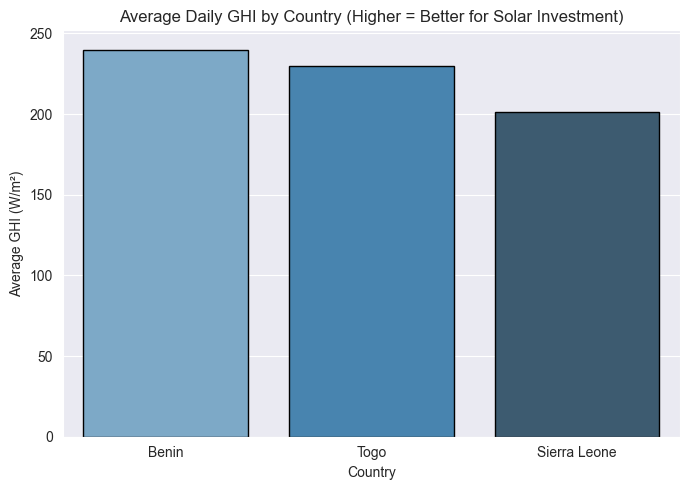

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === File Paths ===
path_benin = r"C:\Users\user\Desktop\KAIM\data\benin_clean.csv"
path_sierraleone = r"C:\Users\user\Desktop\KAIM\data\sierraleone_clean.csv"
path_togo = r"C:\Users\user\Desktop\KAIM\data\togo-dapaong_qc_clean.csv"

# === Load and Preprocess ===
def load_and_prepare(path, country_name):
    df = pd.read_csv(path, parse_dates=['Timestamp'])
    df['Country'] = country_name
    df['Date'] = df['Timestamp'].dt.date
    return df

benin = load_and_prepare(path_benin, 'Benin')
sierra = load_and_prepare(path_sierraleone, 'Sierra Leone')
togo = load_and_prepare(path_togo, 'Togo')

# === Combine all ===
all_data = pd.concat([benin, sierra, togo], ignore_index=True)

# === Compute Daily Averages ===
daily_avg = (
    all_data.groupby(['Country', 'Date'])[['GHI', 'DNI', 'DHI']]
    .mean()
    .reset_index()
)

# === Compare by Country (Overall Mean) ===
country_avg = (
    daily_avg.groupby('Country')[['GHI', 'DNI', 'DHI']]
    .mean()
    .round(2)
    .sort_values(by='GHI', ascending=False)
)

print("=== Average Daily Solar Irradiance by Country ===")
print(country_avg)
print("\nCountry with the highest average GHI:")
print(country_avg.index[0], "— best region for solar investment 🌞")

# === Visualization: Bar Chart for GHI Ranking ===
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
sns.barplot(
    x=country_avg.index,
    y=country_avg['GHI'],
    palette='Blues_d',
    edgecolor='black'
)
plt.title('Average Daily GHI by Country (Higher = Better for Solar Investment)', fontsize=12)
plt.xlabel('Country')
plt.ylabel('Average GHI (W/m²)')
plt.tight_layout()
plt.show()
